# Linear Regression Model
## Introduction
In this notebook we'll be exploring a Linear Regression model to predict the relationship between 

## Dataset
Let's load our dataset and take a look at some of its characterstics:

In [1]:
import pandas as pd
dataset = pd.read_csv('income_population.csv')
print(dataset.head())

   Year  Income  Population
0  2000   30000       12700
1  2001   31000       13000
2  2002   32000       13400
3  2003   33000       13800
4  2004   34000       14200


Our dataset consists of Year, Income, and Population observations. It would be better to explore the data visually before deciding on how to prepare it for the model.

## Data Visualization
Visualizing the dataset to gain better understanding of its structures:

In [2]:
# Summary statistics
dataset.describe()

,Year,Income,Population
count,11.000000,11.00000,11.000000
mean,2005.000000,35000.00000,14709.090909
std,3.316625,3316.62479,1437.674891
min,2000.000000,30000.00000,12700.000000
25%,2002.500000,32500.00000,13600.000000
50%,2005.000000,35000.00000,14600.000000
75%,2007.500000,37500.00000,15750.000000
max,2010.000000,40000.00000,17000.000000


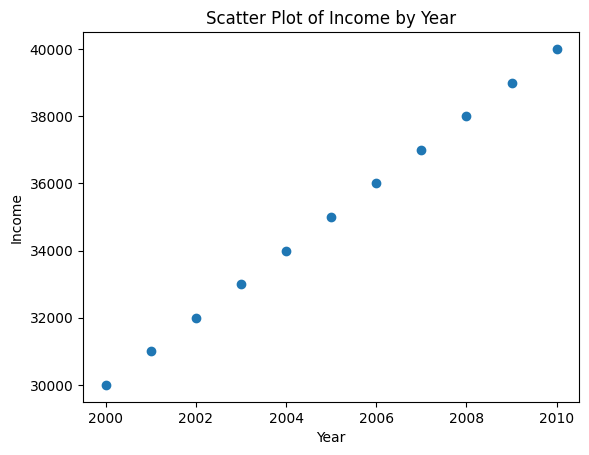

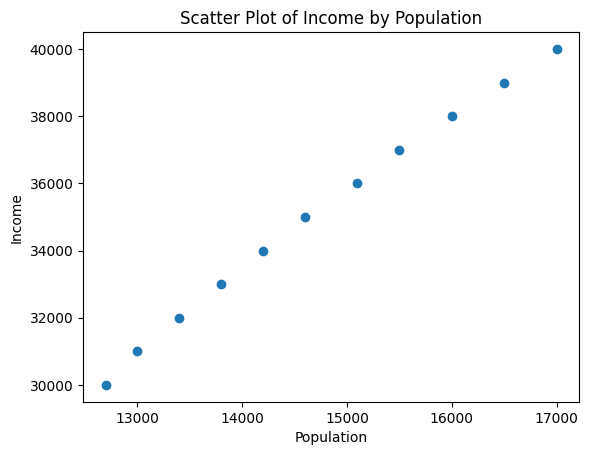

In [3]:
import matplotlib.pyplot as plt
plt.scatter(dataset['Year'], dataset['Income'])
plt.xlabel('Year')
plt.ylabel('Income')
plt.title('Scatter Plot of Income by Year')
plt.show()

plt.scatter(dataset['Population'], dataset['Income'])
plt.xlabel('Population')
plt.ylabel('Income')
plt.title('Scatter Plot of Income by Population')
plt.show()

We can see that there appears to be a positive linear relationship between Income and Year, and between Income and Population.

## Data Preparation
Let's prepare our data for modeling by separating the independent variable (either Year or Population or both) from the dependent variable (Income):

In [4]:
X = dataset[['Year']]
Y = dataset['Income']

# or

X = dataset[['Population']]
Y = dataset['Income']

# or we could use both Year and Population as independent variables.

X = dataset[['Year', 'Population']]
Y = dataset['Income']

### Now, let's build our Linear Regression model:

In [5]:
from sklearn.linear_model import LinearRegression

# Creating Linear Regression Object
model = LinearRegression()

# Fit the model to dataset (train the model)
model.fit(X, Y)

# Print the model coefficients (y = mx +c; m->Coefficient; c->Intercept)
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: -1970000.0000000112
Coefficients: [ 1.00000000e+03 -1.11358701e-14]


Note: The intercept value (-1970000.0000000112) is the predicted Income when Year and Population are both zero, but this scenario is unlikely to happen in reality, so the intercept may not be practically meaningful. The coefficients represent the slope of the linear regression line for each independent variable. The coefficient for Year is 1.00000000e+03, meaning that for every increase of one year, Income will increase by $1,000. The coefficient for Population is close to zero, indicating that Population may not have a significant impact on Income in this dataset.

## Model Evaluation 
Let's evaluate our model's performance by calculating its R-squared value:

In [6]:
from sklearn.metrics import r2_score

# Predict Income values from Year and Population using our model
income_pred = model.predict(X)

# Calculate R-squared value
r_squared = r2_score(Y, income_pred)

print('R-square:', r_squared)

R-square: 1.0


We have R-square value of 1, indicating a perfect fit for the linear relationship between Income, Year, and Population. Know more about R-square [here](https://www.scribbr.com/statistics/coefficient-of-determination/).

## Income Forecast
Let's forecast the predicted income values for a new set of Year and Population values:

In [7]:
# Predicting the output
new_data = pd.DataFrame({'Year': [2022, 2023, 2024], 'Population': [500000, 550000, 600000]})
predicted_income = model.predict(new_data)
print(predicted_income)

[51999.99999999 52999.99999999 53999.99999999]
